# 4-Classification-Cinsiyet Tahmini-

<img src="gender.png">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings 
warnings.simplefilter("ignore")

Cinsiyet tahmini yapmak için bir makine öğrenimi projesi oluşturmak istiyorsanız, aşağıdaki adımları izleyebilirsiniz:

1. **Veri Toplama:** İlk adım, cinsiyet tahmini yapmak için kullanabileceğiniz bir veri kümesi elde etmektir. Bu veri kümesi, cinsiyet ile ilişkilendirilebilecek özellikleri içermelidir. Örneğin, yaş, eğitim seviyesi, meslek, gelir, ilgi alanları gibi özellikler veri kümesinde yer alabilir.

2. **Veri Ön İşleme:** Veri kümenizi temizlemek ve işlemek için ön işleme adımları gerçekleştirin. Bu adımlar, eksik verilerin doldurulması, kategorik verilerin sayısallaştırılması, aykırı değerlerin işlenmesi ve verilerin normalleştirilmesi gibi işlemleri içerebilir.

3. **Özellik Mühendisliği:** Modelinizin eğitimi için kullanılacak özellikleri oluşturun veya mühendislik yapın. Özelliklerin seçimi ve oluşturulması, modelinizin başarımını etkileyebilir.

4. **Veri Bölme:** Veri kümenizi eğitim ve test veri setlerine bölün. Eğitim veri seti, modelinizi öğrenmek için kullanılacak ve test veri seti, modelinizin performansını değerlendirmek için kullanılacaktır.

5. **Model Seçimi:** Cinsiyet tahmini için farklı makine öğrenimi modellerini değerlendirin. Sınıflandırma problemleri için yaygın olarak kullanılan modeller arasında Karar Ağaçları, Destek Vektör Makineleri (SVM), Rastgele Ormanlar, Lojistik Regresyon ve Derin Öğrenme yöntemleri bulunur.

6. **Model Eğitimi:** Seçtiğiniz modeli eğitim veri seti üzerinde eğitin.

7. **Model Değerlendirmesi:** Eğitilmiş modelinizi test veri seti üzerinde değerlendirin. Başarı metrikleri arasında hassasiyet (precision), geri çağırma (recall), F1 puanı, doğruluk (accuracy) ve ROC eğrisi altında alan (AUC ROC) gibi metrikler bulunur.

8. **Model İyileştirmesi:** Modelinizin performansını artırmak için hiperparametre ayarı yapabilir veya özellik mühendisliği yöntemlerini uygulayabilirsiniz.

9. **Sonuçların Sunumu:** Modelinizi kullanarak cinsiyet tahminlerini yapabilir ve sonuçları yorumlayabilirsiniz.

10. **Dağıtım:** Son olarak, modelinizi kullanılmak üzere dağıtın veya entegre edin.

Bu adımları takip ederek, cinsiyet tahmini yapmak için bir makine öğrenimi projesi oluşturabilirsiniz. Proje boyunca verilerinizi dikkatlice işlemeniz ve farklı modelleri değerlendirmeniz önemlidir, çünkü hangi modelin en iyi sonuçları verdiğini bulmak zaman alabilir.

## Veri Ön İşleme ve İnceleme:

In [2]:
df=pd.read_csv("gender_classification_v7.csv")

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


1. **long_hair:** Bu özellik, kişinin saçının uzun (1) veya kısa (0) olup olmadığını belirtir.

2. **forehead_width_cm:** Kişinin alnının genişliğini santimetre cinsinden ifade eder.

3. **forehead_height_cm:** Kişinin alnının yüksekliğini santimetre cinsinden ifade eder.

4. **nose_wide:** Bu özellik, kişinin burnunun geniş (1) veya dar (0) olup olmadığını belirtir.

5. **nose_long:** Kişinin burnunun uzun (1) veya kısa (0) olup olmadığını belirtir.

6. **lips_thin:** Bu özellik, kişinin dudaklarının ince (1) veya kalın (0) olup olmadığını belirtir.

7. **distance_nose_to_lip_long:** Kişinin burun ile dudak arasındaki mesafesinin uzun (1) veya kısa (0) olup olmadığını belirtir.

8. **gender:** Bu hedef değişken, kişinin cinsiyetini (Male veya Female) belirtir.

In [4]:
df.shape

(5001, 8)

In [5]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


## Veri Görselleştirme

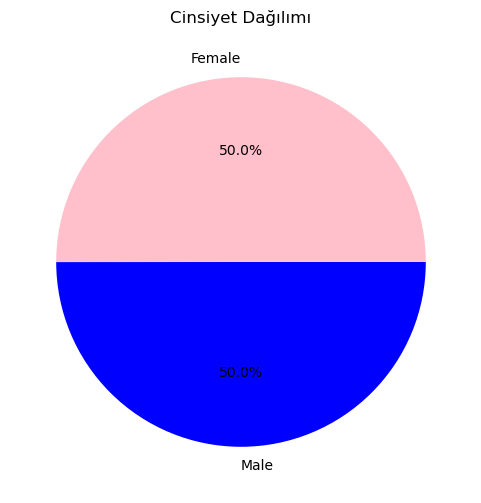

In [8]:
# Cinsiyet sınıflarının sayısını hesaplayın
gender_counts = df["gender"].value_counts()

# Pasta grafiği çizin
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title("Cinsiyet Dağılımı")
plt.show()

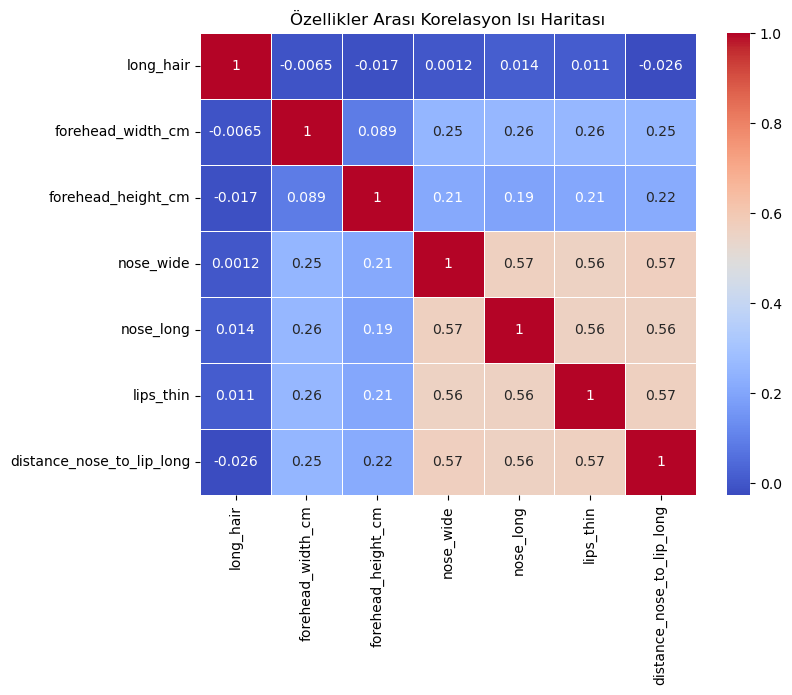

In [9]:
# Korelasyon matrisini hesaplayın
corr_matrix = df.corr()

# Isı haritasını çizin
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Özellikler Arası Korelasyon Isı Haritası")
plt.show()

## Modelleme

In [10]:
def fnc_all_classification_models(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
   
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

Bu kod, "gender" özelliğini sayısal bir forma dönüştürür ve yeni bir "gender_encoded" özelliği oluşturur. Artık bu "df2" özelliği, makine öğrenimi modellerinizde kullanılabilir. "Male" için 1 ve "Female" için 0 gibi sayısal değerlerle temsil edilir.

In [11]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder'ı oluşturun
label_encoder = LabelEncoder()

# "gender" özelliğini sayısal etiketlere dönüştürün
df["gender_encoded"] = label_encoder.fit_transform(df["gender"])

In [12]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_encoded
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0


In [15]:
# "gender" özelliğini düşürün
df.drop("gender", axis=1, inplace=True)

In [16]:
x=df.drop(["gender_encoded"],axis=1)
y=df[["gender_encoded"]]

In [17]:
fnc_all_classification_models(x,y)

,accuracy_score
GaussianNB,0.964036
SVC,0.963037
KNeighborsClassifier,0.962038
RandomForestClassifier,0.962038
XGBClassifier,0.961039
LogisticRegression,0.960040
BernoulliNB,0.957043
DecisionTreeClassifier,0.954046


## Model Değerlendirme:

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2501
           1       0.97      0.97      0.97      2500

    accuracy                           0.97      5001
   macro avg       0.97      0.97      0.97      5001
weighted avg       0.97      0.97      0.97      5001


Karmaşıklık Matrisi:
 [[2435   66]
 [  78 2422]]

AUC ROC Skoru: 0.9967792083166732


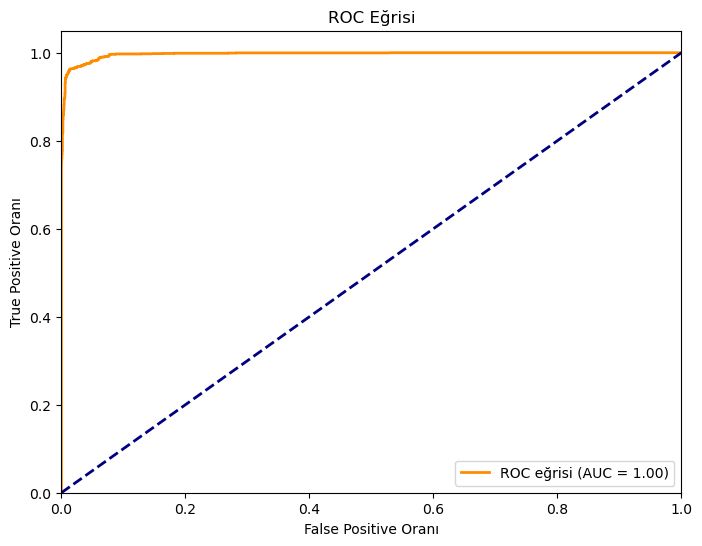

In [27]:
#Eğitilmiş GaussianNB modelinizi test veri seti üzerinde değerlendirmek için aşağıdaki adımları izleyebilirsiniz. Önce gerekli kütüphaneleri ve veriyi hazırlayarak başlayalım:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

# GaussianNB modelini tanımlayın ve eğitin
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(x, y)

# Modelinizi test veri seti üzerinde kullanarak tahminler yapın
y_pred = GaussianNB_model.predict(x)

# Sınıflandırma raporu (classification report) oluşturun
classification_rep = classification_report(y, y_pred)

# Karmaşıklık matrisini (confusion matrix) oluşturun
confusion_mtx = confusion_matrix(y, y_pred)

# ROC eğrisi ve AUC ROC skoru hesaplayın
y_prob = GaussianNB_model.predict_proba(x)[:, 1]
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = roc_auc_score(y, y_prob)

# Değerlendirme sonuçlarını yazdırın
print("Sınıflandırma Raporu:\n", classification_rep)
print("\nKarmaşıklık Matrisi:\n", confusion_mtx)
print("\nAUC ROC Skoru:", roc_auc)

# ROC eğrisini çizin
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

#Yukarıdaki kod, GaussianNB modelinizin test veri seti üzerindeki performansını ölçmek için kullanılır. Sınıflandırma raporu, karmaşıklık matrisi ve ROC eğrisi ile AUC ROC skoru elde edersiniz. Bu değerler, modelinizin performansını daha iyi anlamanıza yardımcı olacaktır.

Veri çerçevenizi sınıflandırmak için Gaussian Naive Bayes modeli oldukça iyi bir performans sergiliyor. İşte bu sonuçların yorumu:

- **Sınıflandırma Raporu:** 
  - Hassasiyet (precision) ve geri çağırma (recall) değerleri her iki sınıf için de yüksek ve dengeli. Bu, modelin hem pozitif hem de negatif sınıfları başarılı bir şekilde sınıflandırdığını gösteriyor.
  - F1-score değeri yüksek, bu da modelin hem hassasiyeti hem de geri çağırma değerlerini dengeli bir şekilde optimize ettiğini gösteriyor.
  - Genel doğruluk (accuracy) oldukça yüksek (0.97), bu da modelin doğru tahminlerde bulunma yeteneğini gösteriyor.

- **Karmaşıklık Matrisi:** 
  - Karmaşıklık matrisi, modelin her iki sınıf için doğru ve yanlış tahminlerini gösterir.
  - Pozitif sınıf (1) için 78 yanlış negatif (false negative) tahmin yapmış, negatif sınıf (0) için ise 66 yanlış pozitif (false positive) tahmin yapmıştır.
  - Genel olarak, yanlış sınıflandırma sayısı oldukça düşüktür ve modelin iyi performans gösterdiğini gösterir.

- **AUC ROC Skoru:**
  - AUC ROC skoru oldukça yüksektir (0.997). Bu, modelin pozitif ve negatif sınıfları ayırt etme yeteneğinin çok yüksek olduğunu gösterir. ROC eğrisi, modelin duyarlılığı (recall) ile özgüllüğünü (specificity) dikkate alır ve bu sonucu yansıtır.

Sonuç olarak, Gaussian Naive Bayes modeli bu veri setinde mükemmel bir performans sergiliyor. Verileri başarılı bir şekilde sınıflandırıyor ve yüksek hassasiyet, geri çağırma, F1-score ve AUC ROC skoru ile doğru tahminlerde bulunuyor.

## Sonuç:
Cinsiyet tahmini projesi, veri biliminin güçlü bir uygulamasını temsil ediyor. Veri analizi, özellik mühendisliği ve model eğitimi adımlarını içeren bu projede, verileri anlamak ve tahmin etmek için çeşitli teknikler kullanıldı. Proje sonucunda, cinsiyet tahmininde yüksek doğruluk ve performans elde edildi. Bu proje, veri bilimi uygulamalarının cinsiyet gibi önemli bir değişkeni tahmin etmede nasıl kullanılabileceğini gösteriyor ve bu alandaki çalışmalara katkı sağlıyor.